In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import phik

In [2]:
# Road raw training data
raw_data = pd.read_csv('data/train.csv', index_col=0)
raw_data.head(5)

# Create copy not to work on raw data
data = raw_data.copy()
data.shape

(1460, 80)

In [3]:
# Exclude columns with > 20% missing values
threshold = 0.2
data = data[data.columns[data.isnull().mean() < threshold]]
data.shape

(1460, 75)

Types of data:
- categorical (e.g. color, type of material)
- ordinal (e.g. rating, university grade)  
- numerical
    - discrete (e.g. number of bathrooms, age)
    - continuous (e.g. temperature, weight)

In [4]:
interval_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                   'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                   '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                   'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                   'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                   'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
fake_interval_columns = ['MSSubClass', 'OverallQual', 'OveralCond', 'MoSold']

interval_columns_filtered = list(set(interval_columns) - set(fake_interval_columns))

In [5]:
# Calculate "correlation" between features and target
corr = data.phik_matrix(interval_cols=interval_columns_filtered)

<AxesSubplot:>

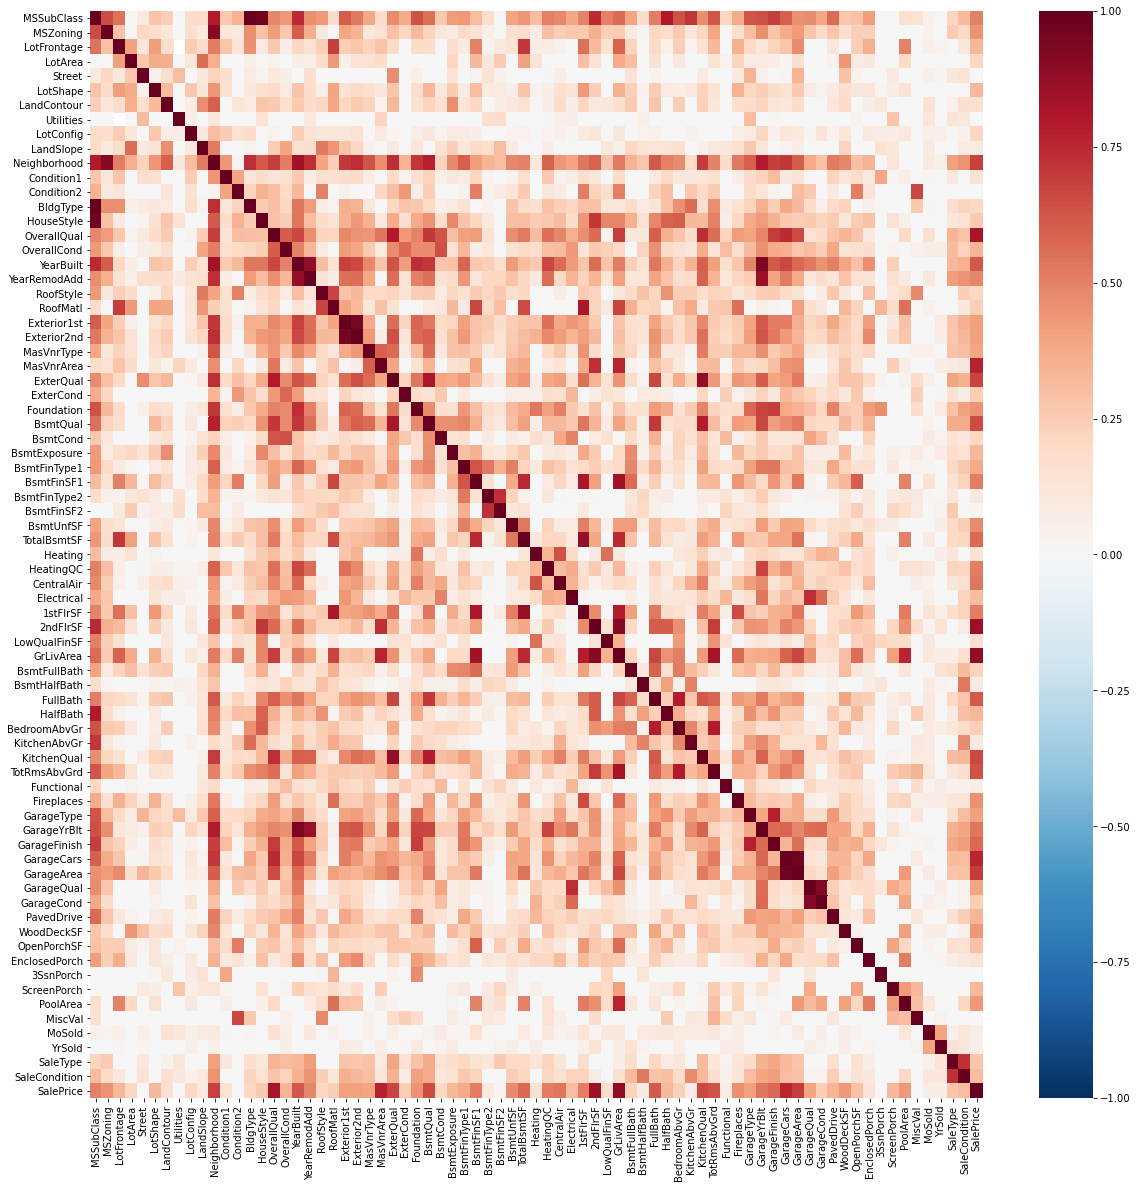

In [6]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor='w')
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, cmap='RdBu_r')